### <u>University choice with Analytical Hierarchy Process (AHP)</u>
#### By Kashosi Aser


#### Task

During this project, I will be using AHP to determine which university I should choose for my masters.
The number of alternatives is 4. The names of the universities will remain anonymous for obvious reasons.
I will replace the names by A1, A2, A3 and A4.

| Description of universities | Name |
| --- | --- |
| <b>University 1</b>: This University Has a world ranking of 4955th, tuition fees of around 3000 USD. No prospect of academic success for the students (I have not read the articles published by their foreign students). Hosting costs around 200 USD per month with no post-graduation placement in the market. The language barrier of the host country is moderate. The host country is not that exciting. The cultural barrier can however be easily crossed. | <b>A1</b> |
| <b>University 2</b>: The Ranking is better: 235th, tuition fee of 3200 USD. Promising academic prospects, even for foreign students (1 in 7 being foreign). The acceptance rate is 29%. Welcoming 400 USD / month, this university offers a bright future for placement in the job market. The country of origin is pretty. The cultural barrier can be crossed. | <b>A2</b> |
| <b>University 3</b>: World Ranking 1715, Tuition: USD 3000 with moderate academic recognition (achievable) Accommodation: USD 300 / month. The chances of placement in the labor market seem good and the country is pleasant. However, crossing language and cultural barriers is essential to be successful, which will not be easy. | <b>A3</b> |
| <b>University 4</b>: The Ranking is around 1204, I won't be forced to pay tuition. This university turns out to have good academic programs (one needs to publish at least 2 papers to complete the first year). Chances of getting admission are 0-3%, hosting is USD 100 / month. Placement on the starch market is not on the horizon. I don't really like the host country. The linguistic and cultural barrier is almost impossible to cross. | <b>A4</b> |

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Establish the critaria
I will first describe the criteria on which my decision will be based 


|   | criteria   |
| --- | ------ |
| 1 |Global Ranking |
| 2 |Tuition fees |
| 3 |Academic recognition |
| 4 |Acceptancy rate |
| 5 |Accommodation |
| 6 |Job Placement |
| 7 |Country |
| 8 |Language Barrier |

#### 1. Alternatives compared with respect to Global Ranking

<table>
    <thead>
        <th>Global Ranking<th>
        <th>A1<th>
        <th>A2<th>
        <th>A3<th>
        <th>A4<th>
    </thead>
    <tbody>
        <tr>
            <th>A1</th>
            <td colspan="2">1</td>
            <td colspan="2">1/8</td>
            <td colspan="2">1/3</td>
            <td colspan="2">1/7</td>
        </tr>
        <tr>
            <th>A2</th>
            <td colspan="2">8</td>
            <td colspan="2">1</td>
            <td colspan="2">6</td>
            <td colspan="2">5</td>
        </tr>
        <tr>
            <th>A3</th>
            <td colspan="2">3</td>
            <td colspan="2">1/6</td>
            <td colspan="2">1</td>
            <td colspan="2">1/2</td>
        </tr>
        <tr>
            <th>A4</th>
            <td colspan="2">7</td>
            <td colspan="2">1/5</td>
            <td colspan="2">2</td>
            <td colspan="2">1</td>
        </tr>
    </tbody>
</table>

I will first add two variables that will do the following(for lack of imagination, I will use the same name used in most AHP tutorials <strong>"M_LOCAL"</strong> and <strong>"y_GOAL"</strong>)
<ul>
    <li>M_LOCAL : A matrix that will hold all local priority vectors of alternatives</li>
    <li>y_GOAL: The priority vector for our final pairwise matrix</li>
</ul>


In [2]:
M_LOCAL = []
y_GOAL = []

In [3]:
# pairwise comparison matrix with respect to global Ranking
g_ranking_matrix = np.array([[1, 1/8, 1/3, 1/7],
                         [8, 1, 6, 5],
                         [3, 1/6, 1, 1/2],
                         [7, 1/5, 2, 1]])    

g_ranking_matrix

array([[1.        , 0.125     , 0.33333333, 0.14285714],
       [8.        , 1.        , 6.        , 5.        ],
       [3.        , 0.16666667, 1.        , 0.5       ],
       [7.        , 0.2       , 2.        , 1.        ]])

### prior_vec()

Function for calculating the priority vector and consistency index with given pairwise comparison matrix A

In [4]:
 def prior_vec(A):
    
    # L - eigenvalues, v - eigenvectors
    L, v = np.linalg.eig(A)
    
    # eigenvalues can be complex, we calculate absolute values
    abs_L = np.abs(L)
    
    # max eigenvalue
    lambda_max = max(abs_L)

    # eigenvector corresponding to the max eigenvalue
    i = np.argmax(abs_L)
    W = v[:, i]
    w = W/sum(W)
    
    # consistency index
    n = A.shape[0]
    cons_index = (lambda_max - n)/(n - 1)
       
    return cons_index, np.abs(w)

### get_result() 

Function for generating the final results given a pairwise comparison matrix M, and/or labels, degree of the axis to accommodate labels 
The "computeGlobal" parameter helps differentiate between local and gobal results.
We really don't want to append the global results to the locals do we :)

In [5]:
def get_result(M, labels=[], computeGlobal=False ,dgrLabels=0):
    # CI - consistency index, PV - priority vector
    CI, PV = prior_vec(M)
    
    # add the priority vector to our M_LOCAL for local results only otherwise update y_GOAL(for global only)
    if computeGlobal:y_GOAL.append(PV)
    else: M_LOCAL.append(PV)
   
    
    # Random consistency indexes
    RI = np.array([
        [1, 0],
        [2, 0],
        [3, 0.52],
        [4, 0.89],
        [5, 1.11],
        [6, 1.25],
        [7, 1.35],
        [8, 1.40],
        [9, 1.45],
        [10, 1.49],
    ])
    # get size of matrix M
    # check if M is a square Matrix
    if len(M.shape) < 3 and M.shape[0] == M.shape[1]: size = M.shape[0]
    else : return "wrong input"
    
    # CR - consistency ratio = CI/RI
    CR = 0
    for ele in RI:
        if ele[0] == size:
            # CR - consistency ratio = CI/RI (see above)
            CR = CI/ele[1]
            
    if CR < 0.1:
        plt.bar(labels, PV)
        plt.xticks(rotation = dgrLabels) # Rotates X-Axis Ticks by DgrLabels-degrees
        plt.show()
        print(f'priority vector {PV.round(4)}')
        print(f'consistency index {CI.round(4)}')
        print(f'consistency ratio {CR.round(4)}')
    else : return "The matrix is inconsistent"
        

#### Global ranking results


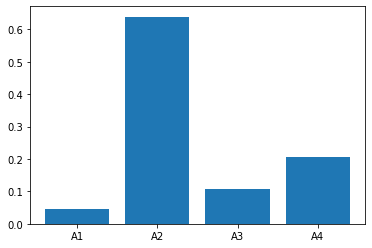

priority vector [0.0455 0.6394 0.1082 0.2069]
consistency index 0.0673
consistency ratio 0.0756


In [6]:
get_result(M=g_ranking_matrix, labels=["A1","A2","A3","A4"])

#### 2. Aternatives compared with respect to Tuition fees

In [7]:
# pairwise comparison matrix with respect to tuition fees
tuition_matrix = np.array([[1, 3, 1, 1/7],
                         [1/3, 1, 1/3, 1/8],
                         [1, 3, 1, 1/7],
                         [7, 8, 7, 1]])    

tuition_matrix

array([[1.        , 3.        , 1.        , 0.14285714],
       [0.33333333, 1.        , 0.33333333, 0.125     ],
       [1.        , 3.        , 1.        , 0.14285714],
       [7.        , 8.        , 7.        , 1.        ]])

#### Tuition results

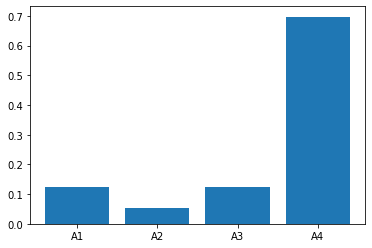

priority vector [0.1242 0.0545 0.1242 0.6972]
consistency index 0.0395
consistency ratio 0.0444


In [8]:
get_result(M=tuition_matrix, labels=["A1","A2","A3","A4"])

#### 3. Aternatives compared with respect to Academic recognition

In [9]:
# pairwise comparison matrix with respect to Academic recognition
acad_matrix = np.array([[1, 1/5, 1/3, 1/6],
                         [5, 1, 4, 1/3],
                         [3, 1/4, 1, 1/5],
                         [6, 3, 5, 1]])    

acad_matrix

array([[1.        , 0.2       , 0.33333333, 0.16666667],
       [5.        , 1.        , 4.        , 0.33333333],
       [3.        , 0.25      , 1.        , 0.2       ],
       [6.        , 3.        , 5.        , 1.        ]])

#### Academic achievements results

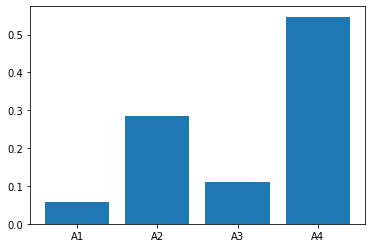

priority vector [0.0577 0.2848 0.1104 0.5471]
consistency index 0.068
consistency ratio 0.0765


In [10]:
get_result(M=acad_matrix, labels=["A1","A2","A3","A4"])

#### 4. Alternatives compared with respect to Acceptancy rate

In [11]:
# pairwise comparison matrix with respect to Acceptancy rate
accept_r_matrix = np.array([[1, 7, 3, 8],
                         [1/7, 1, 1/4, 2],
                         [1/3, 4, 1, 6],
                         [1/8, 1/2, 1/6, 1]])    

accept_r_matrix

array([[1.        , 7.        , 3.        , 8.        ],
       [0.14285714, 1.        , 0.25      , 2.        ],
       [0.33333333, 4.        , 1.        , 6.        ],
       [0.125     , 0.5       , 0.16666667, 1.        ]])

#### Acceptancy rate results

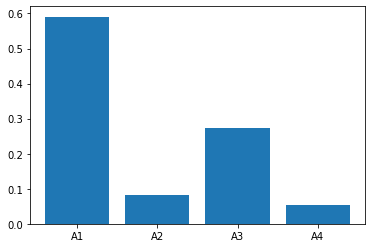

priority vector [0.5908 0.0834 0.2736 0.0522]
consistency index 0.0283
consistency ratio 0.0318


In [12]:
get_result(M=accept_r_matrix, labels=["A1","A2","A3","A4"])

#### 5. Alternatives compared with respect to Accommodation

In [13]:
# pairwise comparison matrix with respect to Accommodation
accom_matrix = np.array([[1, 5, 3, 1/3],
                         [1/5, 1, 1/3, 1/6],
                         [1/3, 3, 1, 1/5],
                         [3, 6, 5, 1]])    

accom_matrix

array([[1.        , 5.        , 3.        , 0.33333333],
       [0.2       , 1.        , 0.33333333, 0.16666667],
       [0.33333333, 3.        , 1.        , 0.2       ],
       [3.        , 6.        , 5.        , 1.        ]])

#### Accommodation results

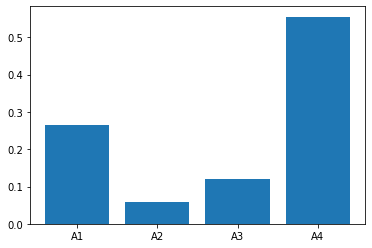

priority vector [0.2661 0.0589 0.1195 0.5554]
consistency index 0.0501
consistency ratio 0.0563


In [14]:
get_result(M=accom_matrix, labels=["A1","A2","A3","A4"])

#### 6. Alternatives compared with respect to Job Placement

In [15]:
# pairwise comparison matrix with respect to Job Placement
job_matrix = np.array([[1, 1/5, 1/3, 2],
                         [5, 1, 3, 6],
                         [3, 1/3, 1, 5],
                         [1/2, 1/6, 1/5, 1]])    

job_matrix

array([[1.        , 0.2       , 0.33333333, 2.        ],
       [5.        , 1.        , 3.        , 6.        ],
       [3.        , 0.33333333, 1.        , 5.        ],
       [0.5       , 0.16666667, 0.2       , 1.        ]])

#### Job Placement results

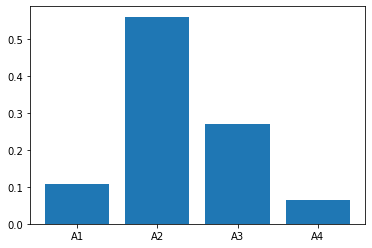

priority vector [0.107  0.5594 0.2688 0.0648]
consistency index 0.0312
consistency ratio 0.0351


In [16]:
get_result(M=job_matrix, labels=["A1","A2","A3","A4"])

#### 7. Alternatives compared with respect to Country

In [17]:
# pairwise comparison matrix with respect to the Country
country_matrix = np.array([[1, 1/4, 1/4, 1/3],
                         [4, 1, 1, 5],
                         [4, 1, 1, 5],
                         [3, 1/5, 1/5, 1]])    

country_matrix

array([[1.        , 0.25      , 0.25      , 0.33333333],
       [4.        , 1.        , 1.        , 5.        ],
       [4.        , 1.        , 1.        , 5.        ],
       [3.        , 0.2       , 0.2       , 1.        ]])

#### Country results

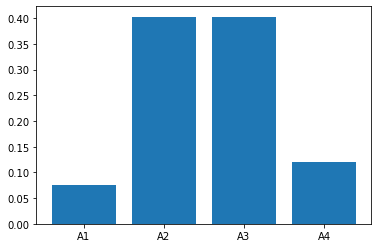

priority vector [0.0748 0.4029 0.4029 0.1195]
consistency index 0.0753
consistency ratio 0.0846


In [18]:
get_result(M=country_matrix, labels=["A1","A2","A3","A4"])

#### 8. Alternatives compared with respect to the Language Barrier

In [19]:
# pairwise comparison matrix with respect to the Language Barrier
lg_matrix = np.array([[1, 2, 2, 5],
                         [1/2, 1, 1, 4],
                         [1/2, 1, 1, 4],
                         [1/5, 1/4, 1/4, 1]])    

lg_matrix

array([[1.  , 2.  , 2.  , 5.  ],
       [0.5 , 1.  , 1.  , 4.  ],
       [0.5 , 1.  , 1.  , 4.  ],
       [0.2 , 0.25, 0.25, 1.  ]])

#### Language Barrier results

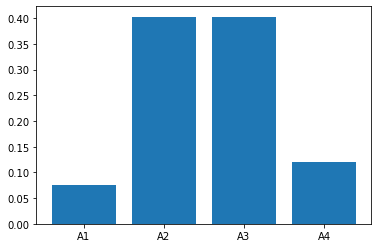

priority vector [0.0748 0.4029 0.4029 0.1195]
consistency index 0.0753
consistency ratio 0.0846


In [20]:
get_result(M=country_matrix, labels=["A1","A2","A3","A4"])

## Criteria comparison for the ultimate choice

<table>
    <thead>
        <th></th>
        <th>Global Ranking</th>
        <th>Tuition fees</th>
        <th>Academic recognition</th>       
        <th>Accommodation</th>
        <th>Job Placement</th>
        <th>Country</th>
        <th>Language Barrier</th>
         <th>Acceptancy rate</th>
    </thead>
    <tbody>
        <tr>
            <th>Global Ranking</th>
            <td>1</td>
            <td>1/3</td>
            <td>3</td>
            <td>5</td>
            <td>1/3</td>
            <td>7</td>
            <td>6</td>
            <td>4</td>
        </tr>
        <tr>
            <th>Tuition fees</th>
            <td >3</td>
            <td >1</td>
            <td >4</td>
            <td >6</td>
            <td >1</td>
            <td >8</td>
            <td>7</td>
            <td >5</td>
        </tr>
        <tr>
            <th>Academic recognition</th>
            <td >1/3</td>
            <td>1/4</td>
            <td >1</td>
            <td>4</td>
            <td>1/4</td>
            <td>6</td>
            <td>5</td>
            <td>3</td>
        </tr>
        <tr>
            <th>Accommodation</th>
            <td >1/5</td>
            <td>1/6</td>
            <td >1/4</td>
            <td>1</td>
            <td>1/6</td>
            <td >4</td>
            <td >3</td>
            <td>1/3</td>
        </tr>
        <tr>
            <th>Job Placement</th>
            <td >3</td>
            <td >1</td>
            <td>4</td>
            <td>6</td>
            <td>1</td>
            <td>8</td>
            <td>7</td>
            <td>5</td>
        </tr>
        <tr>
            <th>Country</th>
            <td >1/7</td>
            <td>1/8</td>
            <td >1/6</td>
            <td>1/4</td>
            <td >1/8</td>
            <td>1</td>
            <td >1/3</td>
            <td >1/5</td>
        </tr>
        <tr>
            <th>Language Barrier</th>
            <td >1/6</td>
            <td >1/7</td>
            <td >1/5</td>
            <td >1/3</td>
            <td >1/7</td>
            <td >3</td>
            <td >1</td>
            <td >1/4</td>
        </tr>
        <tr>
            <th>Acceptancy rate</th>
            <td>1/4</td>
            <td >1/5</td>
            <td >1/3</td>
            <td >3</td>
            <td >1/5</td>
            <td >5</td>
            <td >4</td>
            <td >1</td>
        </tr>
    </tbody>
</table>

In [21]:
# global pairwise comparison matrix
global_matrix = np.array([[1, 1/3, 3, 5, 1/3, 7, 6, 4],
                         [3, 1, 4, 6, 1, 8, 7, 5],
                         [1/3, 1/4, 1, 4, 1/4, 6, 5, 3],
                         [1/5, 1/6, 1/4, 1, 1/6, 4, 3, 1/3],
                         [3, 1, 4, 6, 1, 8, 7, 5],
                         [1/7, 1/8, 1/6, 1/4, 1/8, 1, 1/3, 1/5],
                         [1/6, 1/7, 1/5, 1/3, 1/7, 3, 1, 1/4],
                         [1/4, 1/5, 1/3, 3, 1/5, 5, 4, 1]])    

global_matrix

array([[1.        , 0.33333333, 3.        , 5.        , 0.33333333,
        7.        , 6.        , 4.        ],
       [3.        , 1.        , 4.        , 6.        , 1.        ,
        8.        , 7.        , 5.        ],
       [0.33333333, 0.25      , 1.        , 4.        , 0.25      ,
        6.        , 5.        , 3.        ],
       [0.2       , 0.16666667, 0.25      , 1.        , 0.16666667,
        4.        , 3.        , 0.33333333],
       [3.        , 1.        , 4.        , 6.        , 1.        ,
        8.        , 7.        , 5.        ],
       [0.14285714, 0.125     , 0.16666667, 0.25      , 0.125     ,
        1.        , 0.33333333, 0.2       ],
       [0.16666667, 0.14285714, 0.2       , 0.33333333, 0.14285714,
        3.        , 1.        , 0.25      ],
       [0.25      , 0.2       , 0.33333333, 3.        , 0.2       ,
        5.        , 4.        , 1.        ]])

## Global Criteria Results

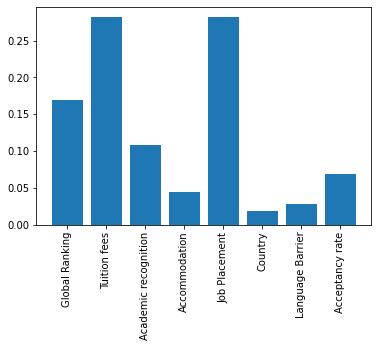

priority vector [0.1692 0.2816 0.1079 0.0438 0.2816 0.019  0.0283 0.0686]
consistency index 0.1041
consistency ratio 0.0744


In [22]:
get_result(M=global_matrix, labels=[
    "Global Ranking","Tuition fees",
    "Academic recognition",
    "Accommodation",
    "Job Placement",
    "Country",
    "Language Barrier",
    "Acceptancy rate"],dgrLabels=90, computeGlobal=True) # and we did not forget to set our computeGlobal to True

## Global Priorities

In [23]:
# And now let's put to good use our M_LOCAL matrix
# consisting of local priority vectors of alternatives with respect to
# Global Ranking, Tuition fees, Academic recognition, 
# Acceptancy rate, Accommodation, Job Placement, Country, Language Barrier

M_LOCAL = np.vstack (M_LOCAL).T

M_LOCAL

array([[0.04545933, 0.12416636, 0.05771984, 0.59078053, 0.26613299,
        0.10702601, 0.07478985, 0.07478985],
       [0.63944043, 0.0544875 , 0.28481752, 0.08339873, 0.05892824,
        0.55935463, 0.40285192, 0.40285192],
       [0.10819074, 0.12416636, 0.11041152, 0.27358275, 0.11953795,
        0.26880809, 0.40285192, 0.40285192],
       [0.20690951, 0.69717977, 0.54705112, 0.05223799, 0.55540083,
        0.06481126, 0.11950631, 0.11950631]])

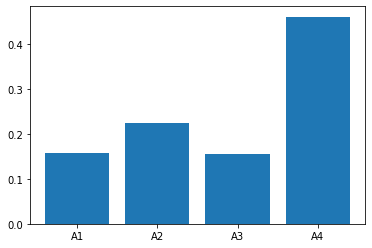

Global priority vector [0.159  0.2242 0.155  0.4619]


In [24]:
# global priority vector
G = M_LOCAL.dot(np.array(y_GOAL).flatten())
# visualization
labels = ['A1', 'A2', 'A3', 'A4']
plt.bar(labels, G)
plt.show()
print(f'Global priority vector {G.round(4)}')

## Conclusion

I would like to express how surprised I was with the results. As the graph shows, the best decision right now is to go with A4 (probably because it is a scholarship program): with a priority of 0.4619. A4 is followed by A2 (where I didn't even consider applying for) with the priority of 0.2242. A1 and A3 can feel tight, with A1 having the slightly higher priority of 0.159 (again, I wasn't even considering applying for this) versus A3 with a priority of 0.159.